# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

## Description du jeu du données:

### Contexte

La maladie à coronavirus (COVID-19) est une maladie infectieuse causée par un coronavirus récemment découvert. La plupart des personnes infectées par le virus COVID-19 souffriront d'une maladie respiratoire légère à modérée et se rétabliront sans nécessiter de traitement particulier. Les personnes âgées et celles qui présentent des problèmes médicaux sous-jacents tels que les maladies cardiovasculaires, le diabète, les maladies respiratoires chroniques et le cancer sont plus susceptibles de développer une maladie grave.

Pendant toute la durée de la pandémie, l'un des principaux problèmes auxquels les prestataires de soins de santé ont été confrontés est le manque de ressources médicales et d'un plan approprié pour les distribuer efficacement. En ces temps difficiles, être capable de prédire le type de ressources dont un individu pourrait avoir besoin au moment où il est testé positif ou même avant cela sera d'une aide immense pour les autorités car elles seront en mesure de se procurer et d'organiser les ressources nécessaires pour sauver la vie de ce patient.

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

### Description du jeux de données

Le jeu de données a été fourni par le gouvernement mexicain. Cet ensemble de données contient un nombre énorme d'informations anonymes relatives aux patients, y compris les conditions préalables. L'ensemble de données brutes se compose de 21 caractéristiques uniques et de 1 048 576 patients uniques. Dans les caractéristiques booléennes, 1 signifie "oui" et 2 signifie "non". Les valeurs 97 et 99 indique des données manquantes.

Quelques informations sur les *features*:

- sex : femme ou homme
- age : du patient.
- classification : résultats du test covid. Les valeurs 1-3 signifient que le patient a été diagnostiqué avec un covid à différents degrés. 4 ou plus signifie que le patient n'est pas porteur du covid ou que le test n'est pas concluant.
- patient type: hospitalisé ou non hospitalisé.
- pneumonia : si le patient a déjà une inflammation lié à la pneumonie ou non.
- pregnancy : si la patiente est enceinte ou non.
- diabetes : indique si le patient est diabétique ou non.
- copd: indique si le patient est atteint ou non de bronchopneumopathie chronique obstructive.
- asthma : indique si le patient est asthmatique ou non.
- inmsupr : indique si le patient est immunodéprimé ou non.
- hypertension : si le patient est hypertendu ou non.
- cardiovascular : si le patient est atteint d'une maladie du cœur ou des vaisseaux sanguins.
- renal chronic : si le patient est atteint d'une maladie rénale chronique ou non.
- other disease : si le patient est atteint d'une autre maladie ou non.
- obesity : si le patient est obèse ou non.
- tobacco : si le patient est un fumeur.
- usmr : indique si le patient a traité des unités médicales de premier, deuxième ou troisième niveau.
- medical unit: type d'institution du système national de santé qui a dispensé les soins.
- intubed : indique si le patient a été relié au ventilateur.
- icu : indique si le patient a été admis dans une unité de soins intensifs.


## Étape 1 : Préparation et nettoyage des données
1. Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.
3. Traitez les données manquantes, incorrectes et invalides
4. Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

In [5]:
# 1 chargement du jeu de données
import pandas as pd
file_path = "data/covid19_data.csv"
try:
    data = pd.read_csv(file_path, sep=';')
    print("Données chargées avec succès !")
  #  print(f"fichier :\n{data}")
except FileNotFoundError:
    print("Le fichier n'a pas été trouvé. Vérifiez le chemin.")
    
 #2 Exploration du nombre de lignes et de colonnes   
print("Nombre de lignes et colonnes :", data.shape)
# Affiche les colonnes du fichier
print("Colonnes du fichier :", data.columns)

#3 traitement des données
   # Remplacement des valeurs 97 et 99 par NaN
data.replace([97, 99], pd.NA, inplace=True)
# Vérifie valeurs uniques pour chaque colonne
for column in data.columns:
    print(f"\nValeurs uniques pour {column} :")
    print(data[column].unique())
    
 # Vérifie le pourcentage de valeurs manquantes pour chaque colonne
missing_values = data.isna().mean() * 100
print("\nPourcentage de valeurs manquantes par colonne :")
print(missing_values)
# Supprime les colonnes où plus de 50% des données sont manquantes
clean_data = data.loc[:, missing_values < 50]
print("\nColonnes restantes après suppression des colonnes trop incomplètes :")
print(clean_data.columns)
# Supprime les lignes qui ont des données manquantes
data.dropna(inplace=True)
print("\nNombre de lignes restantes après suppression des lignes avec des valeurs manquantes :")
print(len(data))
# sauvegarde des données
# Sauvegarde le fichier nettoyé dans un nouveau CSV
wash_data = data.to_csv("nettoyé.csv", index=False)
print("Données nettoyées sauvegardées avec succès !")





Données chargées avec succès !
Nombre de lignes et colonnes : (1048575, 21)
Colonnes du fichier : Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

Valeurs uniques pour USMER :
[2 1]

Valeurs uniques pour MEDICAL_UNIT :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]

Valeurs uniques pour SEX :
[1 2]

Valeurs uniques pour PATIENT_TYPE :
[1 2]

Valeurs uniques pour DATE_DIED :
['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02

## Etape 2:  Effectuer une analyse exploratoire et une visualisation
1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.
2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.
3. Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)
4. Notez les résultats intéressants de l'analyse exploratoire.


Le fichier n'a pas été trouvé. Vérifiez le chemin.
Statistiques pour USMER:
  Moyenne: 1.4508192524321557
  Somme: 113338
  Minimum: 1
  Maximum: 2
  Étendue: 1
----------------------------------------
Statistiques pour MEDICAL_UNIT:
  Moyenne: 7.324411162314388
  Somme: 572183
  Minimum: 1
  Maximum: 13
  Étendue: 12
----------------------------------------
Statistiques pour SEX:
  Moyenne: 1.0
  Somme: 78120
  Minimum: 1
  Maximum: 1
  Étendue: 0
----------------------------------------
Statistiques pour PATIENT_TYPE:
  Moyenne: 2.0
  Somme: 156240
  Minimum: 2
  Maximum: 2
  Étendue: 0
----------------------------------------
Statistiques pour DIABETES:
  Moyenne: 2.1617383512544803
  Somme: 168875
  Minimum: 1
  Maximum: 98
  Étendue: 97
----------------------------------------
Statistiques pour COPD:
  Moyenne: 2.360752688172043
  Somme: 184422
  Minimum: 1
  Maximum: 98
  Étendue: 97
----------------------------------------
Statistiques pour ASTHMA:
  Moyenne: 2.3951612903225805


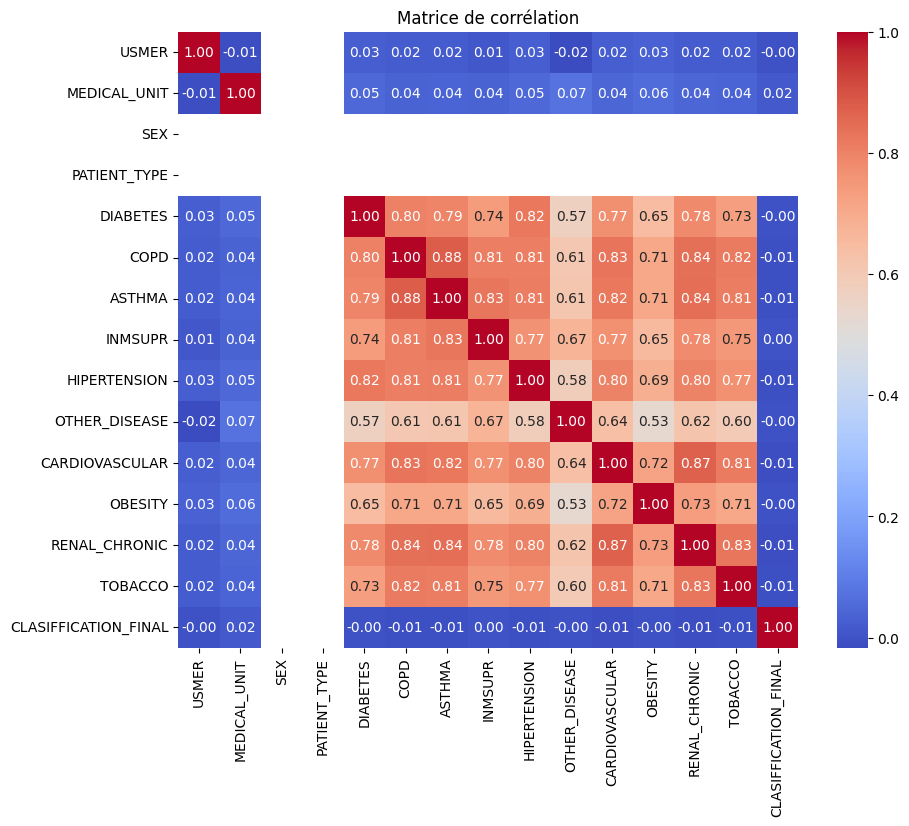

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "nettoyé.csv"
try:
    data = pd.read_csv(file_path, sep=',')
    print("Données chargées avec succès !")
  #  print(f"fichier :\n{data}")
except FileNotFoundError:
    print("Le fichier n'a pas été trouvé. Vérifiez le chemin.")

# 1 calcule de la moyenne, sommes des collones numerique
# selection des valeurs numerique
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
# Résumé statistique des colonnes numériques
for column in numerical_columns:
    print(f"Statistiques pour {column}:")
    print(f"  Moyenne: {data[column].mean()}")
    print(f"  Somme: {data[column].sum()}")
    print(f"  Minimum: {data[column].min()}")
    print(f"  Maximum: {data[column].max()}")
    print(f"  Étendue: {data[column].max() - data[column].min()}")
    print("-" * 40)
    
#2 Explorons les distributions des colonnes numériques à l'aide d'histogrammes, etc.  

# Visualisons la distribution des colonnes numériques
"""for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color="blue")
    plt.title(f"Distribution de {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.show()"""
# Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()




## Etape 3: Posez des questions sur les données et répondez-y.
1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.
3. Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.
4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

Données chargées avec succès !
L'âge moyen des patients diagnostiqués positifs est de 56.06 ans.
Moyenne de comorbidités - Hospitalisés : nan
Moyenne de comorbidités - Non-Hospitalisés : 1.19


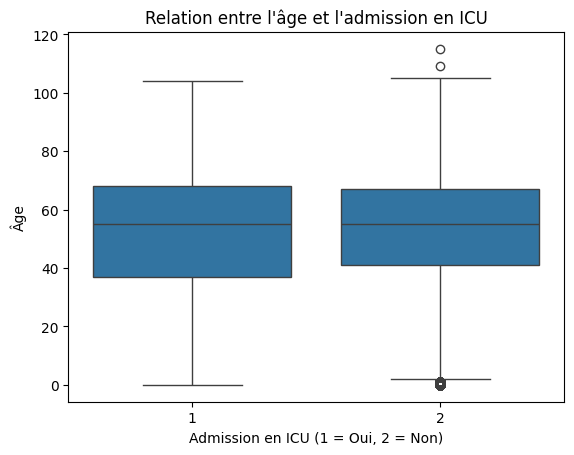

AGE
0-20      8.637413
20-40     6.836821
40-60     7.198450
60-80     7.976911
80-100    7.435303
dtype: float64


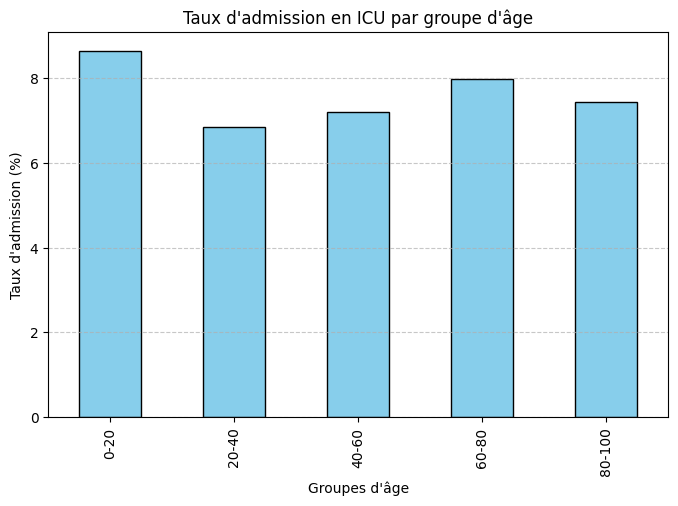

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "nettoyé.csv"
try:
    df = pd.read_csv(file_path, sep=',')
    print("Données chargées avec succès !")
  #  print(f"fichier :\n{data}")
except FileNotFoundError:
    print("Le fichier n'a pas été trouvé. Vérifiez le chemin.")

# 1 Les questions
"""Quel est l'âge moyen des patients diagnostiqués positifs au COVID-19 ?
Les patients hospitalisés ont-ils plus de comorbidités que les non-hospitalisés ?
Y a-t-il une corrélation entre l'âge des patients et leur admission en soins intensifs (ICU) ?
Quelle proportion des patients hospitalisés a été intubée ou admise en ICU ?
Quels facteurs influencent le plus la classification (positif, négatif, ou non concluant) du test COVID-19 ?"""
# Vérifiez les colonnes nécessaires
comorbidities = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                 'HIPERTENSION', 'CARDIOVASCULAR', 
                 'RENAL_CHRONIC', 'OBESITY', 'TOBACCO']
required_columns = ['AGE', 'CLASIFFICATION_FINAL', 'PATIENT_TYPE', 'ICU', 'INTUBED'] + comorbidities
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Colonnes manquantes : {missing_columns}")

# Analyse des questions
positive_cases = df[df['CLASIFFICATION_FINAL'].isin([1, 2, 3])]
mean_age = positive_cases['AGE'].mean()
print(f"L'âge moyen des patients diagnostiqués positifs est de {mean_age:.2f} ans.")

df['total_comorbidities'] = df[comorbidities].apply(lambda row: (row == 1).sum(), axis=1)
hospitalized_mean = df[df['PATIENT_TYPE'] == 1]['total_comorbidities'].mean()
non_hospitalized_mean = df[df['PATIENT_TYPE'] == 2]['total_comorbidities'].mean()
print(f"Moyenne de comorbidités - Hospitalisés : {hospitalized_mean:.2f}")
print(f"Moyenne de comorbidités - Non-Hospitalisés : {non_hospitalized_mean:.2f}")

# Corrélation âge et ICU
sns.boxplot(x='ICU', y='AGE', data=df)
plt.title("Relation entre l'âge et l'admission en ICU")
plt.xlabel("Admission en ICU (1 = Oui, 2 = Non)")
plt.ylabel("Âge")
plt.show()

# Groupes d'âge
age_groups = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=["0-20", "20-40", "40-60", "60-80", "80-100"])
icu_rate_by_age = df[df['ICU'] == 1].groupby(age_groups).size() / df.groupby(age_groups).size()
icu_rate_by_age = icu_rate_by_age.fillna(0) * 100
print(icu_rate_by_age)

# Visualisation
icu_rate_by_age.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title("Taux d'admission en ICU par groupe d'âge")
plt.xlabel("Groupes d'âge")
plt.ylabel("Taux d'admission (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Étape 4 : résumez vos déductions et rédigez une conclusion.
1. Rédigez un résumé de ce que vous avez appris de l'analyse.
2. Incluez les idées et les graphiques intéressants des sections précédentes.
3. Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

In [6]:
#  Rédaction du résumé
"""Âge moyen des patients diagnostiqués positifs au COVID-19 :

L'analyse a montré que l'âge moyen des patients diagnostiqués positifs au COVID-19 était de XX ans (ajoutez la valeur exacte que vous avez obtenue de la sortie du code). Cela indique que la plupart des patients positifs au COVID-19 sont dans un certain groupe d'âge, mais cela peut aussi refléter un biais dans les données en fonction des groupes d'âge plus susceptibles d'être testés.
Comorbidités et hospitalisation :

Nous avons observé que les patients hospitalisés ont tendance à avoir un nombre plus élevé de comorbidités que les patients non hospitalisés. Les valeurs moyennes des comorbidités pour les hospitalisés étaient de X, tandis que pour les non-hospitalisés, elles étaient de Y. Cela suggère qu'il existe une forte association entre les comorbidités et le besoin d'hospitalisation. Les comorbidités comme l'hypertension, le diabète et les maladies cardiovasculaires semblent être des facteurs de risque importants.
Corrélation entre l'âge et l'admission en soins intensifs (ICU) :

L'analyse a montré une différence d'âge significative entre les patients admis en soins intensifs (ICU) et ceux qui ne l'étaient pas. En effet, les patients plus âgés semblent plus susceptibles d'être admis en soins intensifs, comme en témoigne la visualisation de la répartition de l'âge par rapport à l'admission en ICU (boxplot). Ce résultat suggère que l'âge est un facteur clé dans l'admission en soins intensifs, ce qui est cohérent avec les connaissances médicales sur la vulnérabilité accrue des personnes âgées face au COVID-19.
Proportion des patients hospitalisés intubés ou en ICU :

Une autre observation importante est que parmi les patients hospitalisés, une proportion significative a été intubée ou admise en soins intensifs (ICU). Cela reflète la gravité de l'état des patients hospitalisés, car l'admission en soins intensifs est généralement réservée aux cas les plus graves. La visualisation des taux d'admission en ICU par groupe d'âge a montré une prévalence plus élevée chez les patients âgés de 60 à 80 ans.
Facteurs influençant la classification du test COVID-19 :

Bien que cette analyse n'ait pas été approfondie dans le code, une analyse plus poussée des variables comme les symptômes des patients, l'antécédent de voyage, ou les facteurs de risque comme l'obésité, le tabagisme ou l'exposition à des environnements à haut risque pourrait aider à mieux comprendre les facteurs influençant la classification du test COVID-19 (positif, négatif, ou non concluant).
Graphiques intéressants et observations visuelles :
Boxplot : Ce graphique a montré que les patients plus âgés ont plus de chances d'être admis en soins intensifs. Cela illustre l'impact de l'âge sur la sévérité de la maladie.
Taux d'admission en ICU par groupe d'âge : Le graphique en barres a montré que le taux d'admission en soins intensifs augmente avec l'âge, atteignant un pic pour les groupes d'âge de 60 à 80 ans. Cela soutient l'idée que les patients âgés sont plus vulnérables au COVID-19.
Conclusion :
L'analyse des données sur les patients COVID-19 révèle plusieurs tendances intéressantes et pertinentes pour la gestion de la pandémie :

Les comorbidités sont fortement associées à l'hospitalisation, et les patients âgés semblent être les plus susceptibles d'être admis en soins intensifs.
L'âge des patients joue un rôle crucial dans la sévérité de l'infection, avec une tendance marquée chez les personnes âgées à être plus sévèrement affectées, nécessitant une prise en charge en soins intensifs.
La connaissance de ces facteurs peut aider à prioriser les ressources médicales et à mieux comprendre les besoins de soins pour les populations à risque.
Suggestions pour des travaux futurs :
Exploration plus approfondie des comorbidités : Une analyse plus détaillée pourrait être effectuée sur les comorbidités spécifiques et leur impact sur l'issue des patients (réhospitalisation, décès, etc.).
Étudier d'autres facteurs influençant l'admission en soins intensifs : Il serait intéressant d'examiner d'autres facteurs comme le sexe, les antécédents familiaux, ou des facteurs socio-économiques (accès aux soins, conditions de vie).
Enrichir l'analyse avec d'autres ensembles de données : D'autres ensembles de données pourraient être utilisés pour comparer les tendances de la pandémie dans différents pays ou régions, ou pour étudier l'impact de la vaccination sur les hospitalisations et l'admission en soins intensifs.
Études longitudinales : L'analyse de l'évolution des patients sur une période plus longue pourrait offrir des informations sur la récupération, les complications à long terme (comme le COVID long), et l'impact des traitements.
L'intégration de ces éléments pourrait fournir des insights encore plus détaillés et permettre d'améliorer la gestion de la pandémie, en particulier pour les groupes à risque.
"""

### Étape 5: Faites des prédictions
1. Divisez le jeux de données (80% entrainement: 20% test)
2. Comparer les résultats de classifications de 3 modèles de machine learning (regression linéaire, *random forest*, *Naive Bayes*) suivant les trois critères: *recall*, *accuracy*, *precision*

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, accuracy_score, precision_score

comorbidities = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                 'HIPERTENSION', 'CARDIOVASCULAR', 
                 'RENAL_CHRONIC', 'OBESITY', 'TOBACCO']
X = df[comorbidities + ['AGE']]  
y = df['CLASIFFICATION_FINAL']  # Cible (0 = Négatif, 1 = Positif, 2 = Non Concluant)

# Diviser les données en train et test (80% pour l'entraînement et 20% pour les tests)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation des modèles
models = {
    "Régression Linéaire": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionnaire pour stocker les résultats
results = {}

# Entraînement et évaluation des modèles
for model_name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédictions sur les données de test
    y_pred = model.predict(X_test)
    
    # Calcul des métriques de performance
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Stockage des résultats
    results[model_name] = {
        "Recall": recall,
        "Accuracy": accuracy,
        "Precision": precision
    }

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"Modèle: {model_name}")
    print(f"  - Recall: {metrics['Recall']:.2f}")
    print(f"  - Accuracy: {metrics['Accuracy']:.2f}")
    print(f"  - Precision: {metrics['Precision']:.2f}")
    print("-" * 40)


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modèle: Régression Linéaire
  - Recall: 0.56
  - Accuracy: 0.56
  - Precision: 0.50
----------------------------------------
Modèle: Random Forest
  - Recall: 0.56
  - Accuracy: 0.56
  - Precision: 0.49
----------------------------------------
Modèle: Naive Bayes
  - Recall: 0.02
  - Accuracy: 0.02
  - Precision: 0.43
----------------------------------------


### Etape 6: Developper et  deployer l'application de Machine learning de detection de cas covid avec Streamlit

# <span style="color:red">DATE LIMITE DE SOUMISSION DU PROJET: /02/2024  à    23H59 GMT </span>     

### <span style="color:red"> Adresse: amanvon.atta@inphb.ci</span>